In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [2]:
url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df.info() # ou df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# verificar o tipo específico de dado
# como os dados estão em um tipo de dictionary, é preciso normalizar esses dados
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Coluna '{col}' - Tipos de dados:")
        print(df[col].apply(type).value_counts())
        print("-" * 30)

Coluna 'customerID' - Tipos de dados:
customerID
<class 'str'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'Churn' - Tipos de dados:
Churn
<class 'str'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'customer' - Tipos de dados:
customer
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'phone' - Tipos de dados:
phone
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'internet' - Tipos de dados:
internet
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'account' - Tipos de dados:
account
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------


#🔧 Transformação

In [5]:
from pandas import json_normalize
df_normalizado = json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [7]:
# verificar valores unicos
for col in df_normalizado.columns:
  print(f"Coluna: {col}")
  print(df_normalizado[col].unique())
  print("-" * 50)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Coluna: Churn
['No' 'Yes' '']
--------------------------------------------------
Coluna: customer.gender
['Female' 'Male']
--------------------------------------------------
Coluna: customer.SeniorCitizen
[0 1]
--------------------------------------------------
Coluna: customer.Partner
['Yes' 'No']
--------------------------------------------------
Coluna: customer.Dependents
['Yes' 'No']
--------------------------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
--------------------------------------------------
Coluna: phon

In [9]:
#Duplicados
print("Numero de duplicados", df_normalizado.duplicated().sum())

Numero de duplicados 0


In [10]:
# Nulos
print("Numero de Nulos", df_normalizado.isnull().sum())

Numero de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [11]:
# Vazios ou em branco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [12]:
# Eliminando as colunas de Churn

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de linhas depois de eliminar as vazias em coluna 'Churn':", len(df_normalizado))

Número de linhas depois de eliminar as vazias em coluna 'Churn': 7043


In [13]:
tipos = df_normalizado['account.Charges.Total'].apply(type).value_counts()
print(tipos)

account.Charges.Total
<class 'str'>    7043
Name: count, dtype: int64


In [14]:
for col in df_normalizado.columns:
    if df_normalizado[col].dtype == 'object':
        print(f"Coluna '{col}' - Tipos de dados:")
        print(df_normalizado[col].apply(type).value_counts())
        print("-" * 30)

Coluna 'customerID' - Tipos de dados:
customerID
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'Churn' - Tipos de dados:
Churn
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'customer.gender' - Tipos de dados:
customer.gender
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'customer.Partner' - Tipos de dados:
customer.Partner
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'customer.Dependents' - Tipos de dados:
customer.Dependents
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'phone.PhoneService' - Tipos de dados:
phone.PhoneService
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'phone.MultipleLines' - Tipos de dados:
phone.MultipleLines
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'internet.InternetService' - Tipo

In [15]:
print(df_normalizado.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [16]:
# transformar a coluna 'account.Charges.Total' para float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [17]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

#📊 Carga e análise

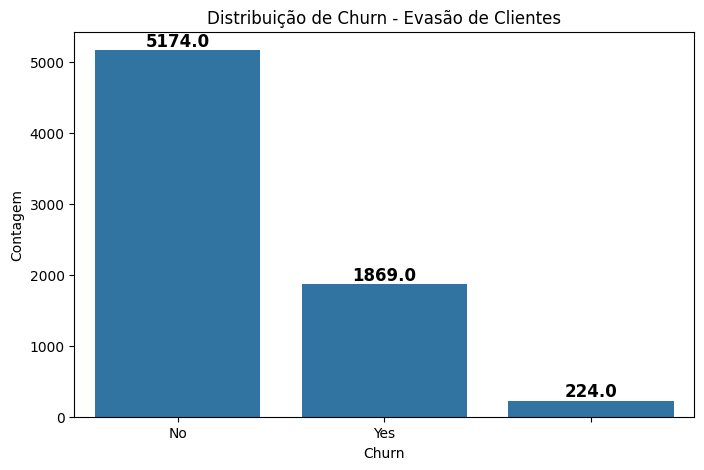

In [18]:
# Criar o gráfico de contagem
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["Churn"])

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title("Distribuição de Churn - Evasão de Clientes")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()

#🔍 Esse gráfico mostra a distribuição da evasão de clientes (churn) na base de dados, dividindo os clientes que cancelaram o serviço (Churn = Yes) e os que permanecem ativos (Churn = No).
#A barra de “No” está muito maior, isso indica que a maior parte dos clientes continua na empresa.

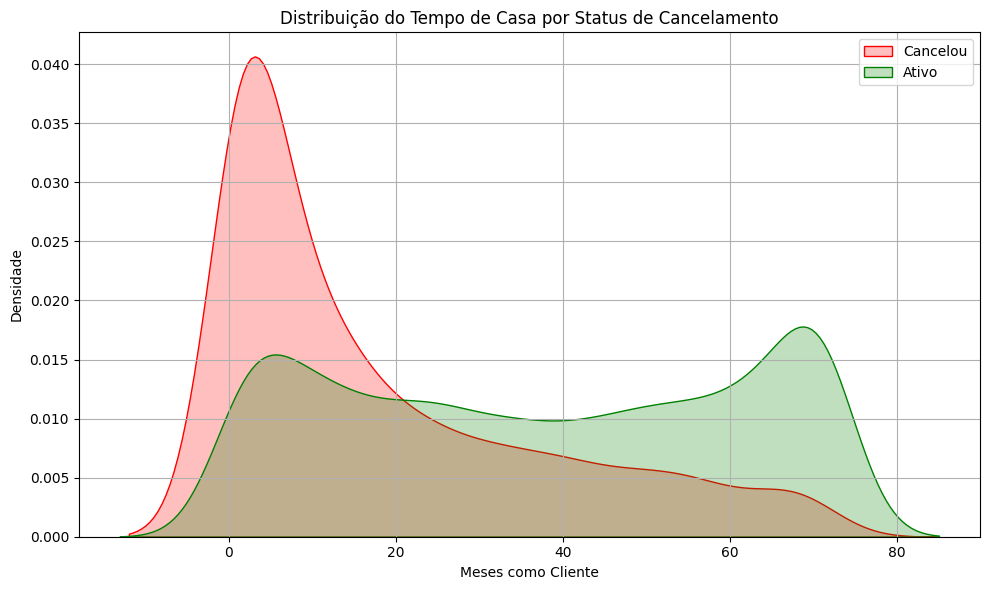

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalizado[df_normalizado['Churn'] == 'Yes']['customer.tenure'], label='Cancelou', fill=True, color='red')
sns.kdeplot(data=df_normalizado[df_normalizado['Churn'] == 'No']['customer.tenure'], label='Ativo', fill=True, color='green')
plt.title('Distribuição do Tempo de Casa por Status de Cancelamento')
plt.xlabel('Meses como Cliente')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Clientes com pouco tempo de contrato apresentam maior risco de churn.
#A permanência tende a aumentar conforme o tempo de serviço.

/tmp/ipython-input-21-2862543761.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


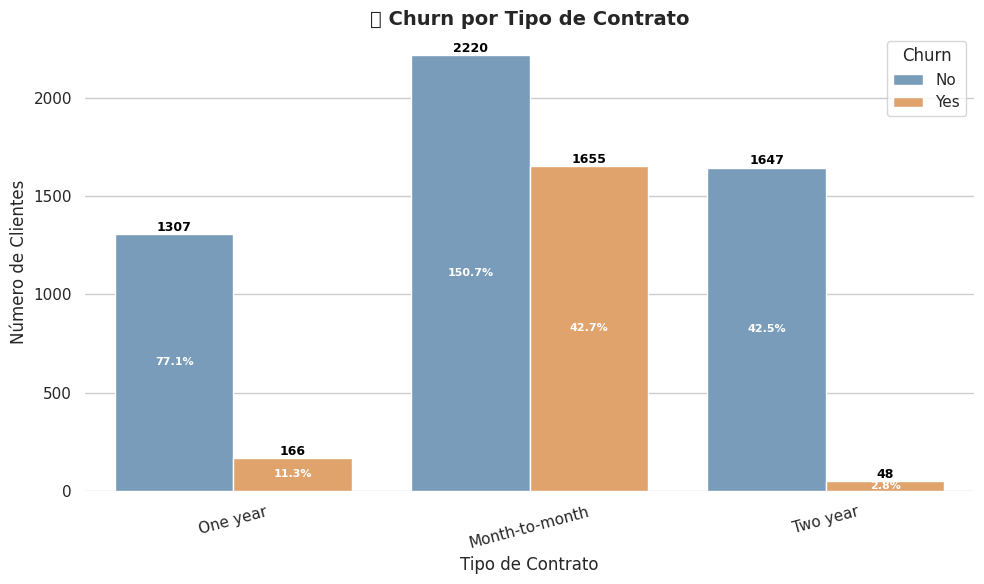

In [21]:
# Estilo visual moderno
sns.set(style="whitegrid")

# Figura
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='account.Contract',
    hue='Churn',
    data=df_normalizado,
    palette=['#6D9DC5', '#F4A259']  # azul e laranja suave
)

# Obter totais por tipo de contrato
totais_contrato = df_normalizado['account.Contract'].value_counts()

# Adicionar rótulos em cada barra
for p in ax.patches:
    altura = int(p.get_height())
    if altura == 0:
        continue

    # Encontrar nome do contrato corretamente
    categoria = p.get_x() + p.get_width() / 2.
    nome_contrato = ax.get_xticklabels()[int(categoria // 1)].get_text()
    total = totais_contrato.get(nome_contrato, 1)
    percentual = 100 * altura / total

    # Porcentagem dentro da barra
    ax.annotate(f'{percentual:.1f}%',
                (p.get_x() + p.get_width() / 2., altura / 2),
                ha='center', va='center',
                fontsize=8, fontweight='bold', color='white')

    # Valor absoluto acima da barra
    ax.annotate(f'{altura}',
                (p.get_x() + p.get_width() / 2., altura + 1),
                ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='black')

# Títulos e rótulos
ax.set_title('📊 Churn por Tipo de Contrato', fontsize=14, weight='bold')
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Churn', loc='upper right')

# Limpar grid de fundo
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-2915770031.py:54: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


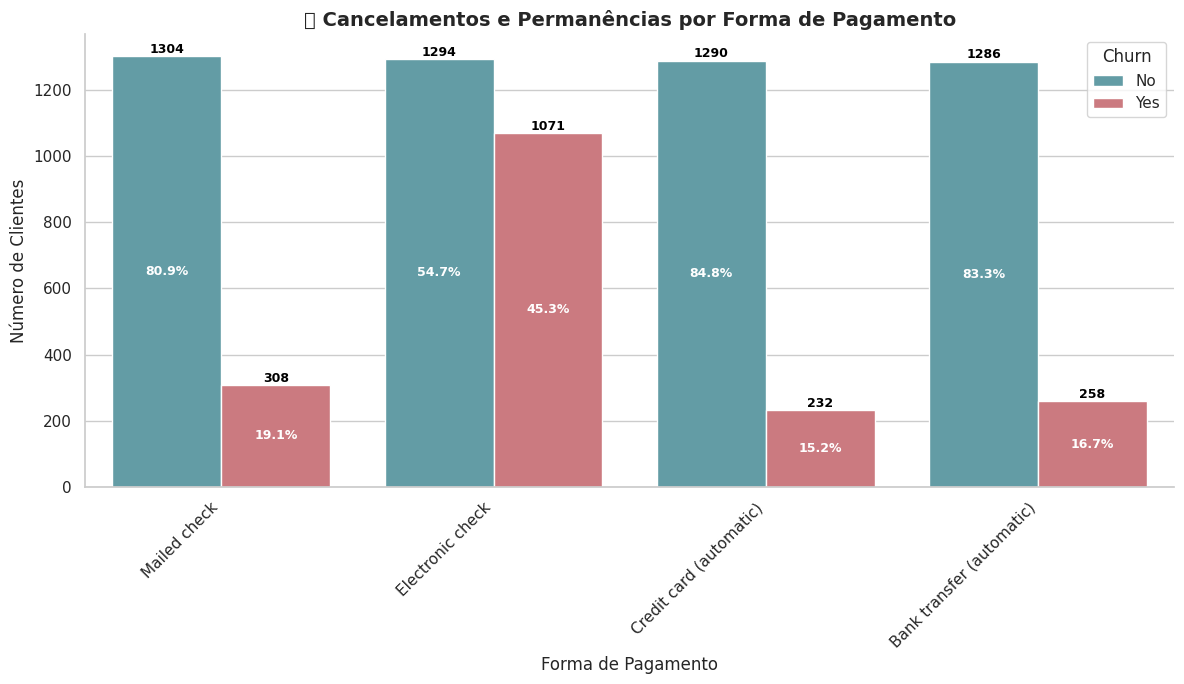

In [22]:
# Estilo limpo e moderno
sns.set(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(12, 7))

# Gráfico de contagem com nova paleta de cores
ax = sns.countplot(
    x='account.PaymentMethod',
    hue='Churn',
    data=df_normalizado,
    palette=['#58A4B0', '#D96C75']  # Azul e salmão
)

# Totais por forma de pagamento
totais_pagamento = df_normalizado['account.PaymentMethod'].value_counts()

# Ajuste de rótulos em cada barra
for p in ax.patches:
    altura = int(p.get_height())
    if altura == 0:
        continue

    # Nome da categoria
    categoria = p.get_x() + p.get_width() / 2.
    xticks = ax.get_xticks()
    categorias = [t.get_text() for t in ax.get_xticklabels()]
    pos = int(round(categoria)) if int(round(categoria)) < len(categorias) else 0
    nome = categorias[pos]
    total = totais_pagamento.get(nome, 1)
    percentual = 100 * altura / total

    # Percentual centralizado dentro da barra
    ax.annotate(f'{percentual:.1f}%',
                (p.get_x() + p.get_width() / 2., altura / 2),
                ha='center', va='center',
                fontsize=9, fontweight='bold', color='white')

    # Valor absoluto fora da barra
    ax.annotate(f'{altura}',
                (p.get_x() + p.get_width() / 2., altura + 1),
                ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='black')

# Títulos e eixos
ax.set_title("📌 Cancelamentos e Permanências por Forma de Pagamento", fontsize=14, weight='bold')
ax.set_xlabel("Forma de Pagamento", fontsize=12)
ax.set_ylabel("Número de Clientes", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', loc='upper right')

# Aparência limpa
sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-3336430122.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])  # Melhor leitura para booleanos
/tmp/ipython-input-24-3336430122.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])  # Melhor leitura para booleanos
/tmp/ipython-input-24-3336430122.py:63: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/tmp/ipython-input-24-3336430122.py:63: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/tmp/ipython-input-24-3336430122.py:63: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/tmp/ipython-input-24-3336430122.py:63: UserWarning: Glyph 128103 (\N{GIRL}) missing from font(s) Dej

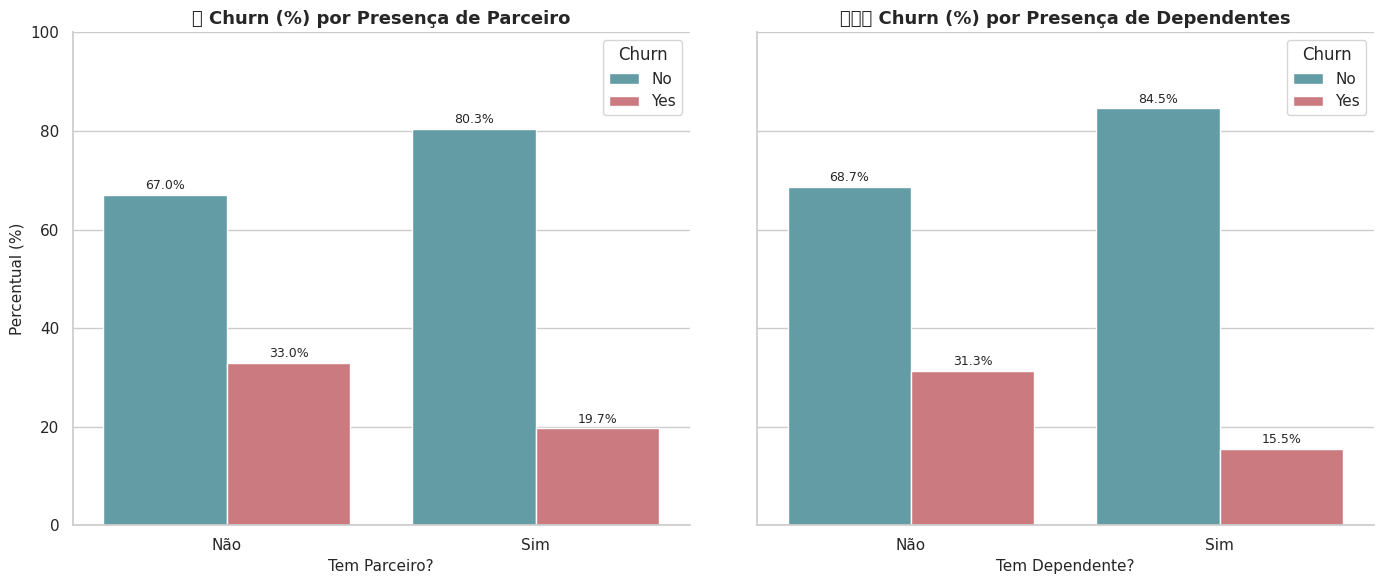

In [24]:
# Estilo visual limpo e moderno
sns.set(style="whitegrid")

# Criação dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 🎯 Gráfico 1: Presença de Parceiro
dados_parceiro = (
    df_normalizado.groupby(['customer.Partner', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_parceiro['percentual'] = dados_parceiro.groupby('customer.Partner')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(
    data=dados_parceiro,
    x='customer.Partner',
    y='percentual',
    hue='Churn',
    ax=axes[0],
    palette=['#58A4B0', '#D96C75']  # Azul para permanência, salmão para churn
)

axes[0].set_title('🎯 Churn (%) por Presença de Parceiro', fontsize=13, weight='bold')
axes[0].set_xlabel('Tem Parceiro?', fontsize=11)
axes[0].set_ylabel('Percentual (%)', fontsize=11)

# Rótulos no gráfico 1
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

# 👨‍👩‍👧 Gráfico 2: Presença de Dependentes
dados_dependente = (
    df_normalizado.groupby(['customer.Dependents', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_dependente['percentual'] = dados_dependente.groupby('customer.Dependents')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(
    data=dados_dependente,
    x='customer.Dependents',
    y='percentual',
    hue='Churn',
    ax=axes[1],
    palette=['#58A4B0', '#D96C75']
)

axes[1].set_title('👨‍👩‍👧 Churn (%) por Presença de Dependentes', fontsize=13, weight='bold')
axes[1].set_xlabel('Tem Dependente?', fontsize=11)
axes[1].set_ylabel('')  # Oculta rótulo redundante do eixo y

# Rótulos no gráfico 2
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

# Ajustes finais
for ax in axes:
    ax.set_ylim(0, 100)
    ax.legend(title='Churn', loc='upper right')
    ax.set_xticklabels(['Não', 'Sim'])  # Melhor leitura para booleanos

plt.tight_layout(w_pad=4)
sns.despine()
plt.show()

#O gráfico mostra que clientes sem parceiro ou sem dependentes apresentam maiores taxas de churn. Ter um parceiro (churn de 20%) ou dependentes parece estar associado à maior estabilidade e permanência. Isso sugere que vínculos familiares influenciam positivamente a retenção, possivelmente pelo maior valor atribuído à continuidade dos serviços no dia a dia.

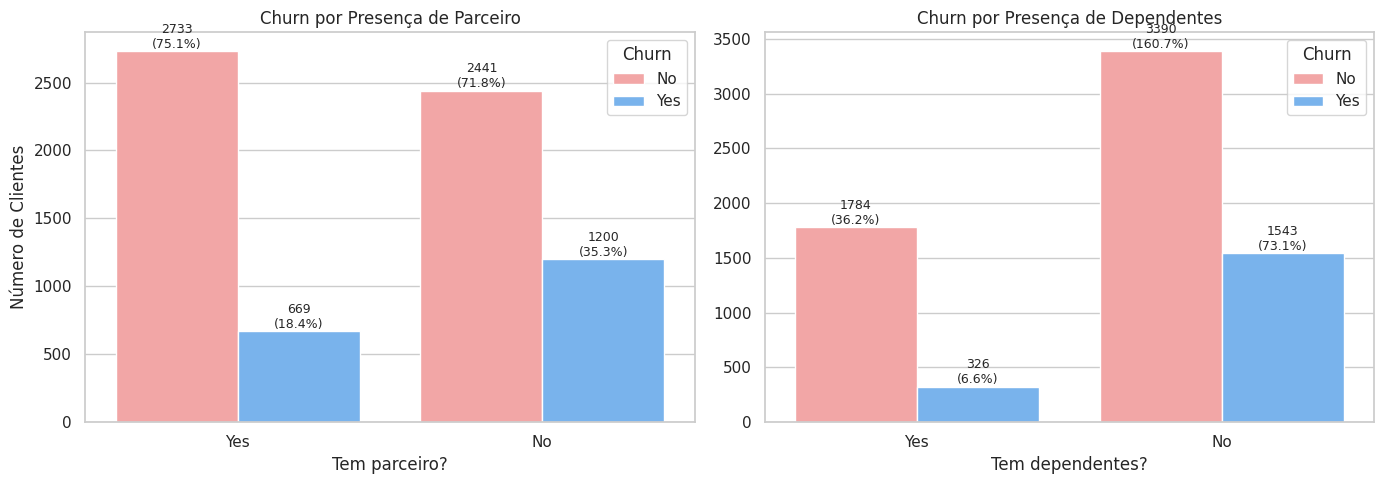

In [25]:
# Paleta de cores personalizada
cores = ['#FF9999', '#66B3FF']  # Churn: Sim / Não

# Função para adicionar rótulos (contagem e percentual)
def adicionar_rotulos(ax, total_por_grupo):
    for container in ax.containers:
        for bar in container:
            altura = bar.get_height()
            if altura == 0:
                continue
            eixo_x = bar.get_x() + bar.get_width() / 2
            chave = 'Yes' if eixo_x > 0.5 else 'No'
            total = total_por_grupo.get(chave, 1)
            percentual = altura / total * 100
            ax.text(
                eixo_x,
                altura + 1,
                f'{int(altura)}\n({percentual:.1f}%)',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Parceiro
total_parceiro = df_normalizado['customer.Partner'].value_counts().to_dict()
ax1 = sns.countplot(data=df_normalizado, x='customer.Partner', hue='Churn', palette=cores, ax=axes[0])
axes[0].set_title('Churn por Presença de Parceiro')
axes[0].set_xlabel('Tem parceiro?')
axes[0].set_ylabel('Número de Clientes')
adicionar_rotulos(ax1, total_parceiro)

# Gráfico 2: Dependentes
total_dependente = df_normalizado['customer.Dependents'].value_counts().to_dict()
ax2 = sns.countplot(data=df_normalizado, x='customer.Dependents', hue='Churn', palette=cores, ax=axes[1])
axes[1].set_title('Churn por Presença de Dependentes')
axes[1].set_xlabel('Tem dependentes?')
axes[1].set_ylabel('')
adicionar_rotulos(ax2, total_dependente)

plt.tight_layout()
plt.show()

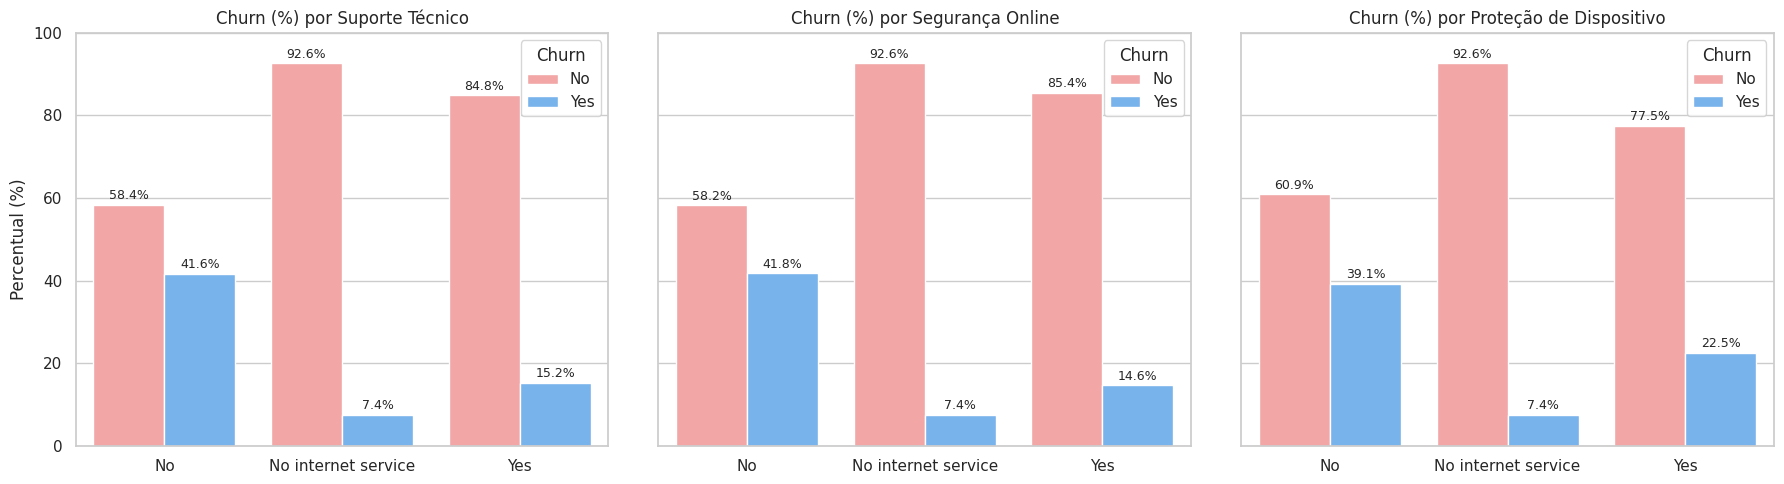

In [27]:
# Define os serviços e seus títulos
servicos = [
    ('internet.TechSupport', 'Suporte Técnico'),
    ('internet.OnlineSecurity', 'Segurança Online'),
    ('internet.DeviceProtection', 'Proteção de Dispositivo')
]

# Define a paleta de cores amigável
cores = ['#FF9999', '#66B3FF']  # Churn: Sim / Não

# Cria os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop pelos serviços
for idx, (coluna, titulo) in enumerate(servicos):
    # Agrupa os dados
    dados = (
        df_normalizado.groupby([coluna, 'Churn'])
        .size()
        .reset_index(name='contagem')
    )
    # Calcula percentuais por grupo
    dados['percentual'] = dados.groupby(coluna)['contagem'].transform(lambda x: x / x.sum() * 100)

    # Cria o gráfico
    ax = sns.barplot(
        data=dados,
        x=coluna,
        y='percentual',
        hue='Churn',
        palette=cores,
        ax=axes[idx]
    )

    # Customiza cada subplot
    ax.set_title(f'Churn (%) por {titulo}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Percentual (%)' if idx == 0 else '')
    ax.set_ylim(0, 100)
    ax.legend(title='Churn', loc='upper right')

    # Adiciona rótulos com percentual
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.tight_layout(w_pad=3)
plt.show()

#Clientes que utilizam serviços como suporte, segurança ou proteção apresentam menor churn, indicando maior percepção de valor.

/tmp/ipython-input-29-3598814212.py:55: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/tmp/ipython-input-29-3598814212.py:55: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


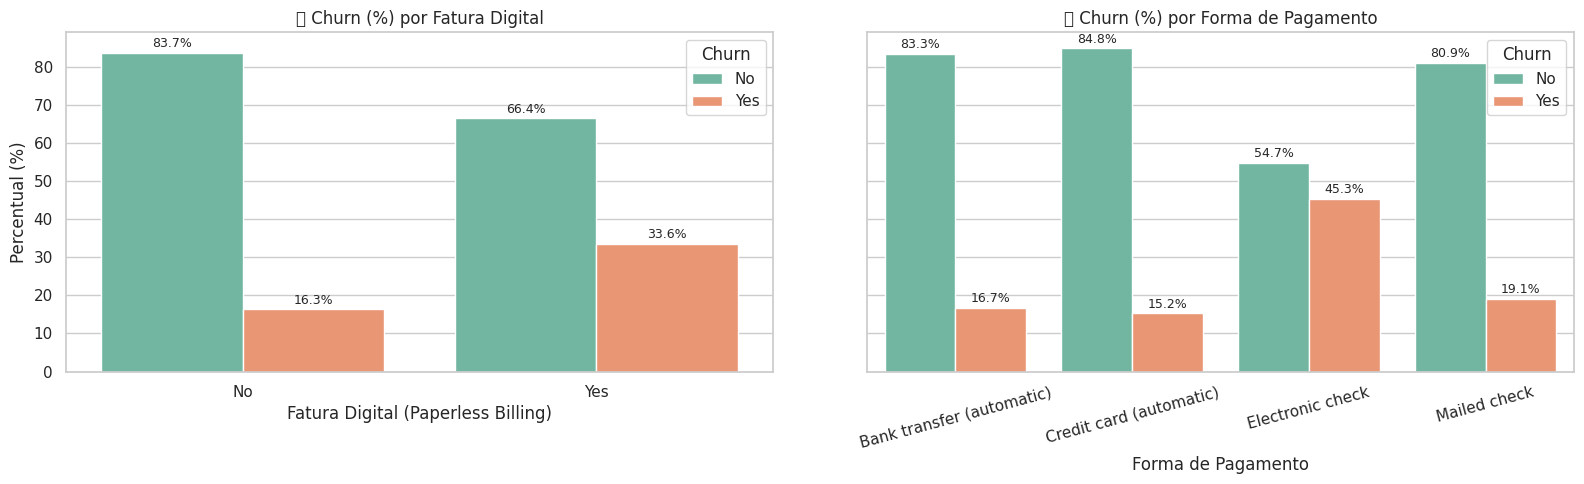

In [29]:
# Estilo visual mais clean
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# 🎫 Gráfico 1: Fatura Digital
dados_fatura = (
    df_normalizado.groupby(['account.PaperlessBilling', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_fatura['percentual'] = dados_fatura.groupby('account.PaperlessBilling')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(
    data=dados_fatura,
    x='account.PaperlessBilling',
    y='percentual',
    hue='Churn',
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title('📄 Churn (%) por Fatura Digital', fontsize=12)
axes[0].set_ylabel('Percentual (%)')
axes[0].set_xlabel('Fatura Digital (Paperless Billing)')
axes[0].legend(title='Churn')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', fontsize=9, padding=2)

# 💳 Gráfico 2: Forma de Pagamento
dados_pagamento = (
    df_normalizado.groupby(['account.PaymentMethod', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_pagamento['percentual'] = dados_pagamento.groupby('account.PaymentMethod')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(
    data=dados_pagamento,
    x='account.PaymentMethod',
    y='percentual',
    hue='Churn',
    ax=axes[1],
    palette='Set2'
)
axes[1].set_title('💳 Churn (%) por Forma de Pagamento', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlabel('Forma de Pagamento')
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend(title='Churn')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', fontsize=9, padding=2)

plt.tight_layout(w_pad=4)
plt.show()

#Clientes com fatura digital e cheque eletrônico apresentam maior churn, sugerindo perfis menos fiéis ou contratos mais voláteis.

/tmp/ipython-input-31-1823399184.py:55: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/tmp/ipython-input-31-1823399184.py:55: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) DejaVu Sans.
  plt.tight_layout(w_pad=4)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


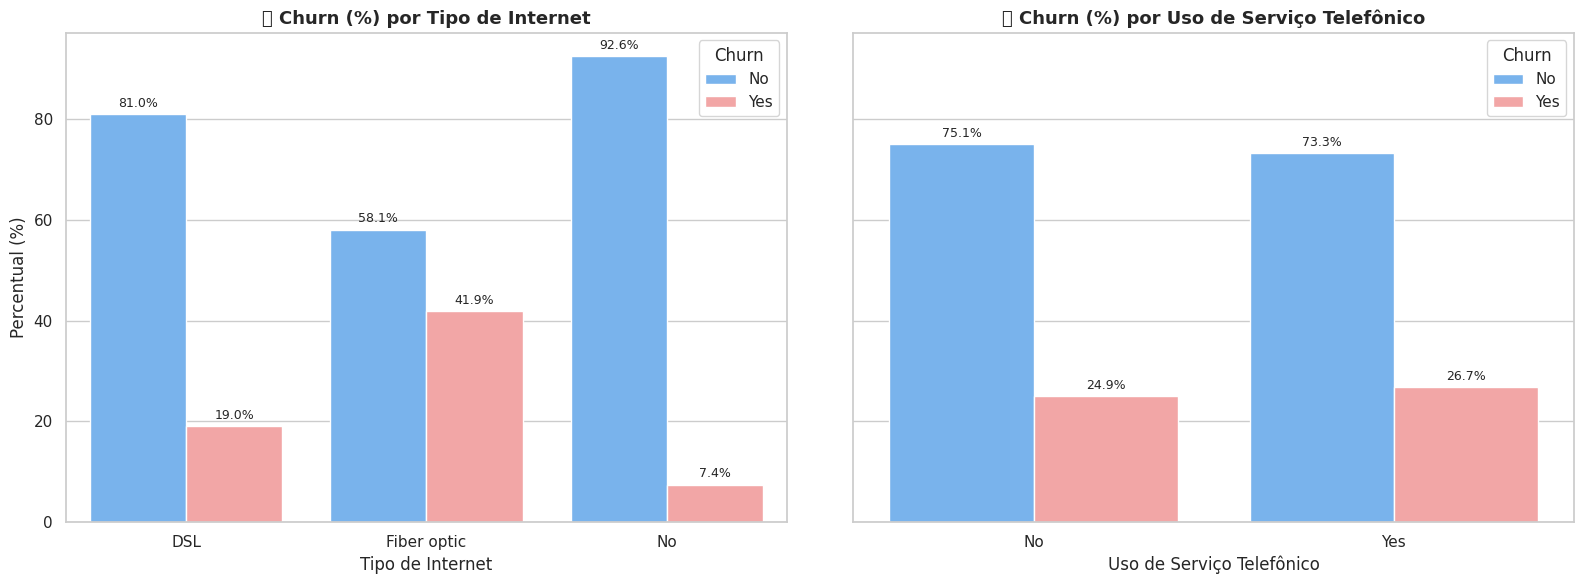

In [31]:
# Estilo clean e consistente
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Paleta consistente para churn (Não = azul claro, Sim = salmão)
palette = ['#66B3FF', '#FF9999']

# Gráfico 1: Tipo de Internet
dados_internet = (
    df_normalizado.groupby(['internet.InternetService', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_internet['percentual'] = dados_internet.groupby('internet.InternetService')['contagem'].transform(lambda x: (x / x.sum()) * 100)

ax1 = sns.barplot(
    data=dados_internet,
    x='internet.InternetService',
    y='percentual',
    hue='Churn',
    palette=palette,
    ax=axes[0]
)
ax1.set_title('🌐 Churn (%) por Tipo de Internet', fontsize=13, fontweight='bold')
ax1.set_xlabel('Tipo de Internet')
ax1.set_ylabel('Percentual (%)')
ax1.legend(title='Churn')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

# Gráfico 2: Uso de Serviço Telefônico
dados_telefone = (
    df_normalizado.groupby(['phone.PhoneService', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_telefone['percentual'] = dados_telefone.groupby('phone.PhoneService')['contagem'].transform(lambda x: (x / x.sum()) * 100)

ax2 = sns.barplot(
    data=dados_telefone,
    x='phone.PhoneService',
    y='percentual',
    hue='Churn',
    palette=palette,
    ax=axes[1]
)
ax2.set_title('📞 Churn (%) por Uso de Serviço Telefônico', fontsize=13, fontweight='bold')
ax2.set_xlabel('Uso de Serviço Telefônico')
ax2.set_ylabel('')
ax2.legend(title='Churn')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

plt.tight_layout(w_pad=4)
plt.show()

#Clientes sem internet ou telefone apresentam churn maior, enquanto quem usa múltiplos serviços demonstra maior fidelização.

In [32]:
df_normalizado = df_normalizado.drop('Total.Day', errors='ignore')


In [33]:
# Calculando os gastos diários
df_normalizado['Total.Day'] = ((df_normalizado['account.Charges.Total'] / df_normalizado['customer.tenure']) /30 ).round(2)

# Inserindo a coluna na posição 19
df_normalizado.insert(19, 'Total.Day', df_normalizado.pop('Total.Day'))

In [34]:
df_normalizado


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [35]:
df_normalizado.describe()


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7032.000000,7043.000000,7032.000000
mean,0.162147,32.371149,2.159879,64.761692,2283.300441
std,0.368612,24.559481,1.006217,30.090047,2266.771362
min,0.000000,0.000000,0.460000,18.250000,18.800000
25%,0.000000,9.000000,1.207500,35.500000,401.450000
50%,0.000000,29.000000,2.350000,70.350000,1397.475000
75%,0.000000,55.000000,3.010000,89.850000,3794.737500
max,1.000000,72.000000,4.050000,118.750000,8684.800000


/tmp/ipython-input-36-317418818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='customer.tenure', palette='Set2')


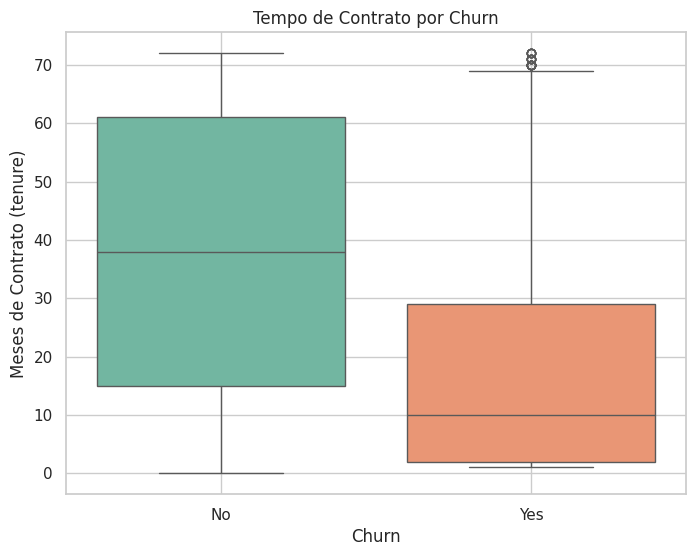

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normalizado, x='Churn', y='customer.tenure', palette='Set2')
plt.title("Tempo de Contrato por Churn")
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato (tenure)")
plt.grid(True)
plt.show()

#clientes que cancelaram tendem a ter menor tempo de contrato.

/tmp/ipython-input-38-3537372830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='account.Charges.Total', palette='Set2')


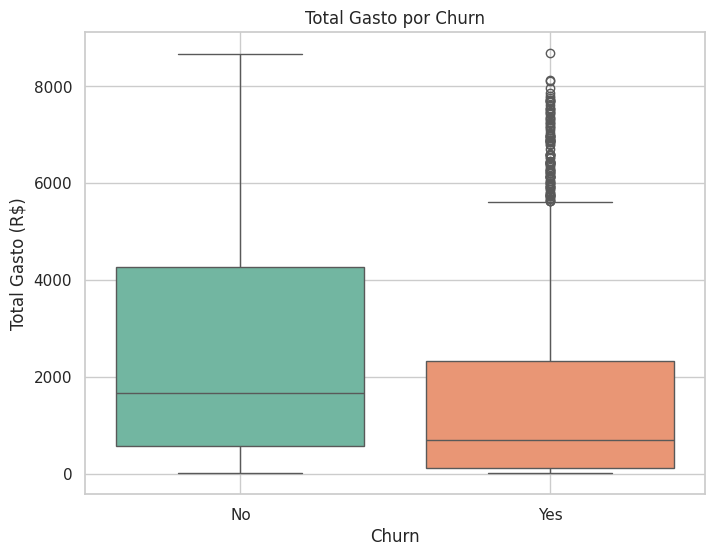

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normalizado, x='Churn', y='account.Charges.Total', palette='Set2')
plt.title("Total Gasto por Churn")
plt.xlabel("Churn")
plt.ylabel("Total Gasto (R$)")
plt.grid(True)
plt.show()

#clientes que gastaram menos podem estar mais propensos a cancelar — talvez por não terem permanecido tempo suficiente para gerar valor.

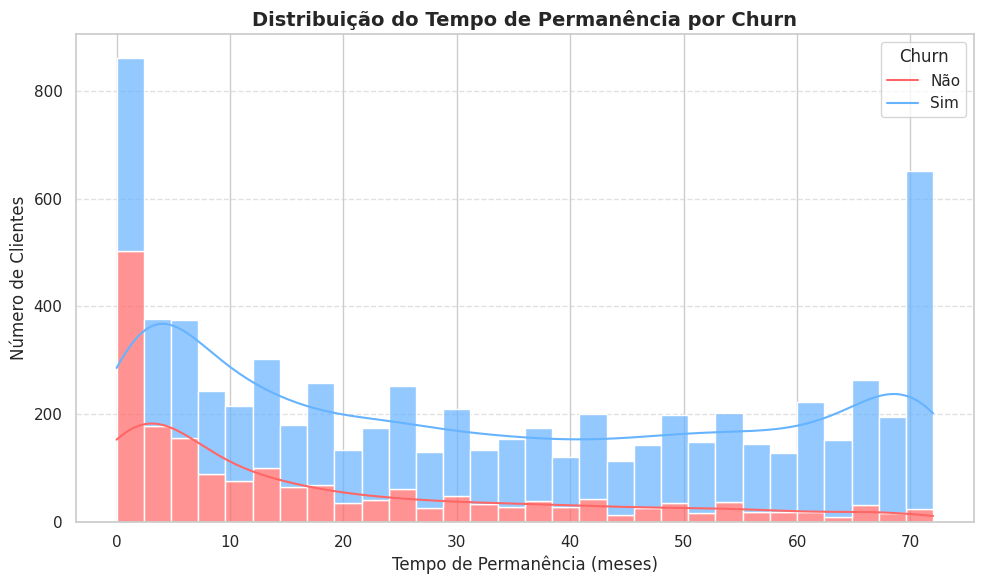

In [41]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_normalizado,
    x='customer.tenure',
    hue='Churn',
    bins=30,
    kde=True,
    multiple='stack',
    palette=['#66B3FF', '#FF6666'],
    alpha=0.7
)

plt.title('Distribuição do Tempo de Permanência por Churn', fontsize=14, fontweight='bold')
plt.xlabel('Tempo de Permanência (meses)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Clientes com pouco tempo de contrato apresentam maior propensão a cancelar (churn concentrado em tenure baixo).
#Já clientes com maior tempo de permanência tendem a permanecer, indicando maior lealdade ou satisfação.

#📄Relatorio Final

# Análise de Churn na Telecom X — Insights e Oportunidades

## Panorama Geral
Embora a maioria dos clientes mantenha seus contratos ativos, o churn ocorre com maior intensidade em determinados perfis e contextos, apontando áreas críticas para retenção.

## Principais Fatores de Risco Identificados
Tempo de contrato: Clientes recentes (menor tenure) apresentam risco significativamente maior de cancelamento, indicando necessidade de maior atenção logo após a contratação.

Tipo de contrato: Contratos mensais têm churn elevado, enquanto contratos anuais/bienais funcionam como barreiras eficazes contra cancelamento precoce.

Contexto familiar: A presença de parceiro(a) e dependentes está correlacionada a menor churn, sugerindo que compromissos familiares aumentam o valor percebido do serviço.

Uso dos serviços: Clientes que não contratam serviços adicionais (suporte técnico, segurança, proteção de dispositivos) têm maior propensão a churn, mostrando a importância de ofertar pacotes completos.

Método de pagamento: Pagamentos via fatura digital e cheque eletrônico apresentam maior churn, possivelmente devido a perfis mais voláteis ou menor envolvimento.

## Oportunidades para Redução do Churn
Estratégias de onboarding: Criar programas focados no primeiro trimestre de contrato para educar, engajar e antecipar possíveis problemas dos novos clientes.

Promoção de planos longos: Incentivar contratos anuais e bienais com descontos ou benefícios exclusivos para aumentar a permanência.

Cross-selling inteligente: Oferecer de forma personalizada os serviços complementares que agregam valor e dificultam o cancelamento.

Campanhas segmentadas por perfil de pagamento: Adaptar abordagens para clientes que usam fatura digital ou cheque, com comunicação que aumente o comprometimento.

## Considerações Finais
A análise indica que o combate ao churn deve ser multidimensional, com foco em ações preventivas especialmente nos primeiros meses, além de incentivar maior engajamento via oferta de serviços e contratos mais longos. Dados e segmentações claras são aliados essenciais para a eficácia das estratégias.